In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
# DUE DATE = [INSERT DATE HERE]
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


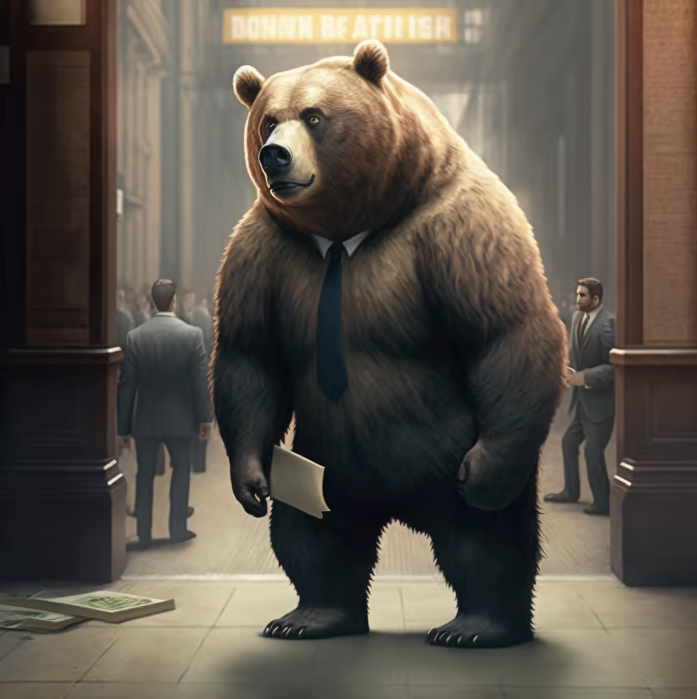
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
### WRITE YOUR CODE ###
data = pd.read_csv("loans.csv")
print("\n\n>>\t\tInitial data in `loans.csv`:\n")
print(data.head())

#dropping the irrelevant column
### WRITE YOUR CODE ###
data = data.drop("Unnamed: 0", axis=1)
print("\n\n>>\t\tData after removing the irrelevant column `Unnamed: 0`:\n")
print(data.head())

#check each feature for missing values and handle them 
### WRITE YOUR CODE ###
# using `isnull` for null/missing values
missing_values = data.isnull().sum()
print("\n\n>>\t\tMissing values for all features (if any):\n")
print(missing_values)

# for displaying features with missing values
features_with_missing_values = missing_values[missing_values > 0]
print("\n\n>>\t\tFeatures with missing values:\n")
print(features_with_missing_values)

# find the mode for each feature and assign as the missing data
for feature in features_with_missing_values.index:
    mode_value = data[feature].mode()[0]
    data[feature].fillna(mode_value, inplace=True)

# the for-loop is better than using `fillna()`...
# since it doens't assume all modes are the same for all features

# for verification
missing_values_after_fill = data.isnull().sum()
print("\n\n>>\t\tMissing values after filling:\n")
print(missing_values_after_fill)


#checking num_duplicates
### WRITE YOUR CODE ###
num_duplicates = data.duplicated().sum()
print("\n\n>>\t\tTotal number of duplicates:\n")
print(num_duplicates)



>>		Initial data in `loans.csv`:

   Unnamed: 0       ID  Amount_Requested  Amount_Funded_By_Investors  \
0           0  81174.0             20000                     20000.0   
1           1  99592.0             19200                     19200.0   
2           2  80059.0             35000                     35000.0   
3           3  15825.0             10000                      9975.0   
4           4  33182.0             12000                     12000.0   

   Interest_Rate  Loan_Length        Loan_Purpose  Debt_To_Income_Ratio  \
0           0.09         36.0  debt_consolidation                  0.15   
1           0.12         36.0  debt_consolidation                  0.28   
2           0.22         60.0  debt_consolidation                  0.24   
3           0.10         36.0  debt_consolidation                  0.14   
4           0.12         36.0         credit_card                  0.19   

  Home_Ownership  Monthly_Income  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \

## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



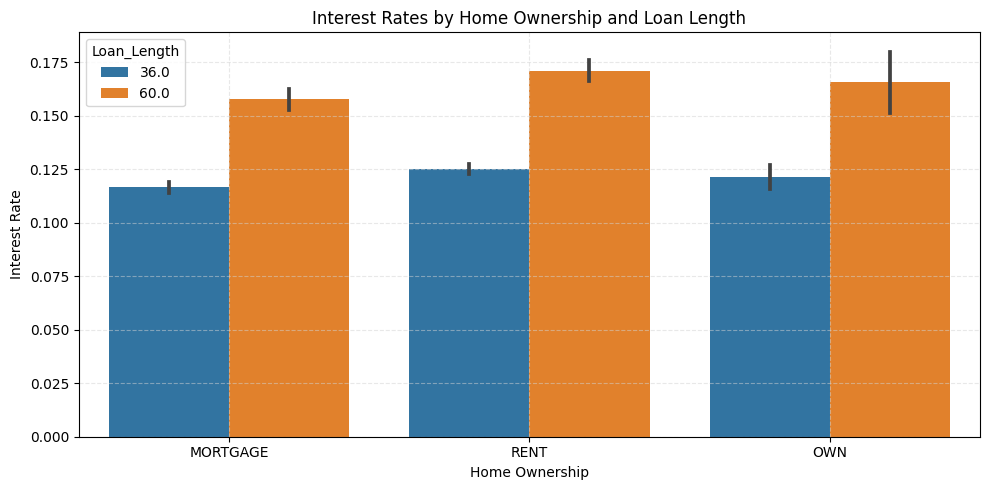

In [10]:
### WRITE YOUR CODE ###
# set size of figure
plt.figure(figsize=(10, 5))

# bar plot using Seaborn
sns.barplot(x="Home_Ownership",
            y="Interest_Rate",
            hue="Loan_Length",
            data=data)

plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')
plt.title('Interest Rates by Home Ownership and Loan Length')

plt.grid(True, linestyle='--', which='both', color='lightgrey', alpha=0.5)
plt.tight_layout()

plt.show()

**Create** a pie plot to demonstrate the share of distribution in home ownership.

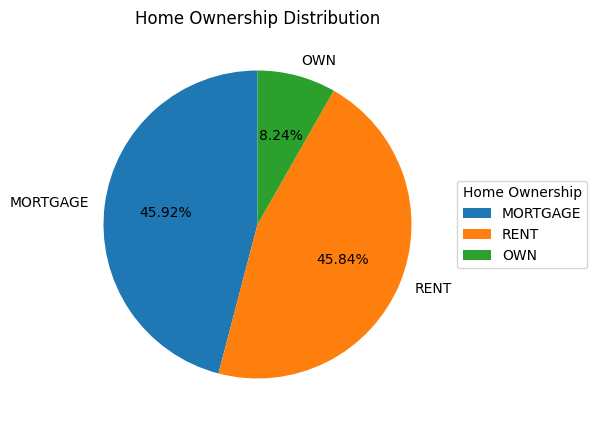

In [11]:
### WRITE YOUR CODE ###
ownership_counts = data['Home_Ownership'].value_counts()

plt.figure(figsize=(5, 5))

pie = plt.pie(ownership_counts,
        labels=ownership_counts.index,
        autopct='%1.2f%%',
        startangle=90)

plt.legend(pie[0],
           ownership_counts.index,
           title='Home Ownership',
           loc='center left',
           bbox_to_anchor=(1, 0.5),)

plt.title('Home Ownership Distribution')

plt.show()

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [ ]:
# df.dtypes

In [14]:
### WRITE YOUR CODE ###
# show the data type of all columns
print(">>>\tData types before conversion:")
print(data.dtypes)

# convert from categorical to numerical
data_new = pd.get_dummies(data)

print("\n>>>\tData types after conversion:")
print(data_new.dtypes)

>>>	Data types before conversion:
ID                                float64
Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

>>>	Data types after conversion:
ID                                 float64
Amount_Requested                     int64
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Monthly_Income                     float64
Open_CREDIT_Lines                    int64
Revolving_CREDIT_Balance    

Create a heatmap to present the relationships between different features.

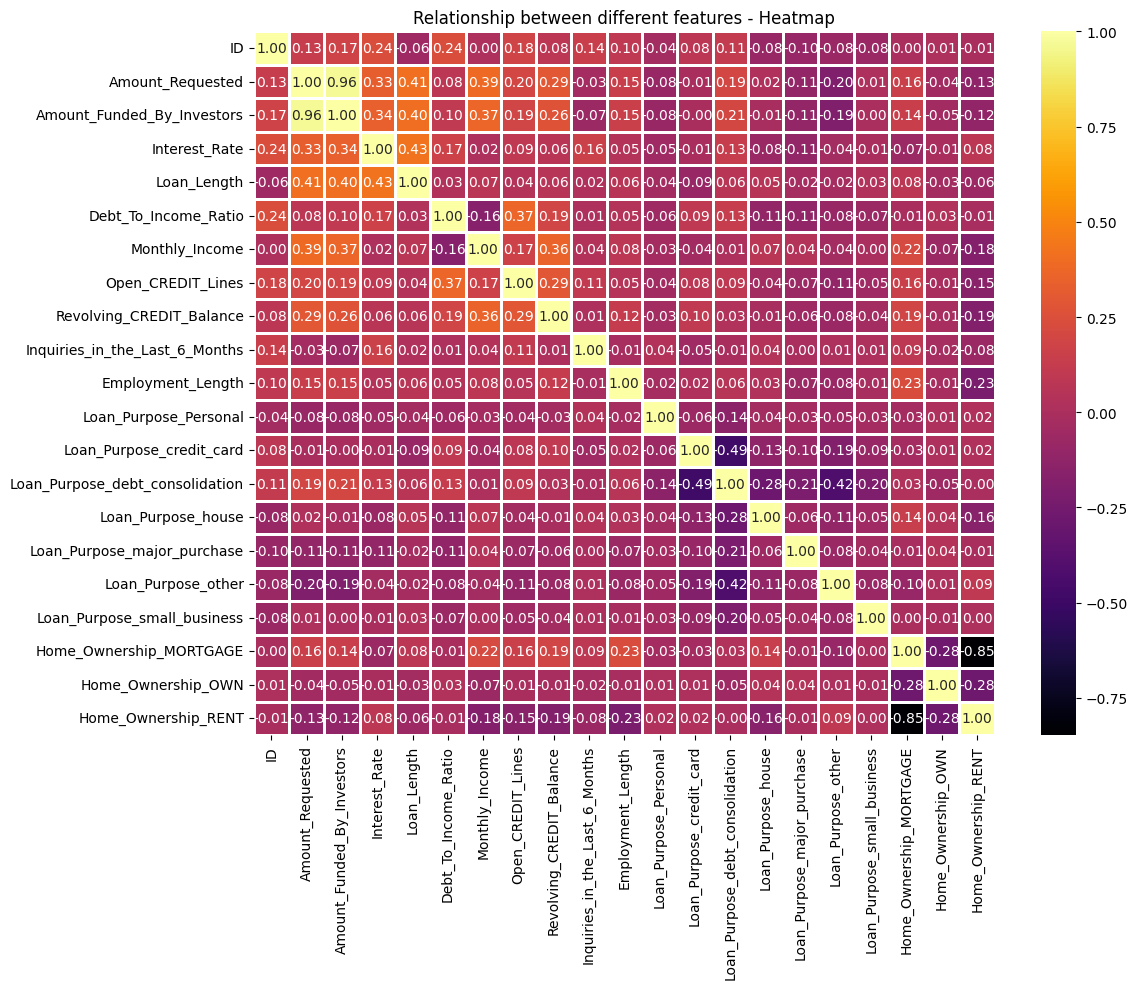

In [26]:
### WRITE YOUR CODE ###
# the correlation matrix of the numerical data
corr_matrix = data_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            fmt=".2f",
            annot=True,
            cmap="inferno",
            linewidths=0.8)

plt.title('Relationship between different features - Heatmap')
plt.tight_layout()

plt.show()

## Model Evaluation (15 pts)

Separate the data into features and labels.



In [27]:
#seperate the data into features and labels
### WRITE YOUR CODE ###
# the "Interest_Rate" column should be dropped...
# since it is the target variable
features = data_new.drop("Interest_Rate",
                         axis=1)  

# the "Interest_Rate" column is assigned as the labels
labels = data_new["Interest_Rate"]  

print(">>>\tFeatures shape:", features.shape)
print("\n>>>\tLabels shape:", labels.shape)

>>>	Features shape: (2500, 20)

>>>	Labels shape: (2500,)


Split the data into training and test data. You could use a ratio of 80/20.

In [29]:
### WRITE YOUR CODE ###
from sklearn.model_selection import train_test_split

# for splitting the data into training and test sets in a reproduceable manner
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42) 

# 42 because Douglas Adams said so

print(">>>\tTraining features shape:", train_features.shape)
print("\n>>>\tTraining labels shape:", train_labels.shape)
print("\n>>>\tTest features shape:", test_features.shape)
print("\n>>>\tTest labels shape:", test_labels.shape)


>>>	Training features shape: (2000, 20)

>>>	Training labels shape: (2000,)

>>>	Test features shape: (500, 20)

>>>	Test labels shape: (500,)


Train a linear regression model on and report the MSE and R2 score on the training data.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a linear regression model and predict
### WRITE YOUR CODE ###
model = LinearRegression()

# training the model
model.fit(train_features, train_labels)

# making predictions on training data
train_predictions = model.predict(train_features)

# Calculate the Mean Squared Error (MSE) and R2 score on training data
### WRITE YOUR CODE ###
mse_train = mean_squared_error(train_labels,
                         train_predictions)
r2_train = r2_score(train_labels,
              train_predictions)

# Print the MSE and R2 score on training data
### WRITE YOUR CODE ###
print(">>>\tMSE on training data:", mse_train)
print("\n>>>\tR2 score on training data:", r2_train)

>>>	MSE on training data: 0.001138108397233497

>>>	R2 score on training data: 0.3268522433190293


Run the model on test data and report the MSE and R2 score.

In [33]:
# Predict the target variable on the test data
### WRITE YOUR CODE ###
test_predictions = model.predict(test_features)

# Calculate the Mean Squared Error (MSE) and R2 score on the test data
### WRITE YOUR CODE ###
mse_test = mean_squared_error(test_labels,
                         test_predictions)
r2_test = r2_score(test_labels,
              test_predictions)

# Print the MSE and R2 score on the test data
### WRITE YOUR CODE ###
print(">>>\tMSE on test data:", mse_test)
print("\n>>>\tR2 score on test data:", r2_test)

>>>	MSE on test data: 0.0012101442804198991

>>>	R2 score on test data: 0.31102441277817683


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Retrieve linear regressor metrics to print later on 
### WRITE YOUR CODE ###
X_train = train_features
X_test = test_features
y_train = train_labels
y_test = test_labels

linear_train_predictions = model.predict(X_train)
linear_test_predictions = model.predict(X_test)
linear_train_mse = mean_squared_error(y_train, linear_train_predictions)
linear_train_r2 = r2_score(y_train, linear_train_predictions)
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
linear_test_r2 = r2_score(y_test, linear_test_predictions)

# Polynomial Regression or some other model 
### WRITE YOUR CODE ###
degree = 2  # $ax^{2} + bx + c$
polynomial_model = make_pipeline(PolynomialFeatures(degree),
                                 StandardScaler(),
                                 SVR())
polynomial_model.fit(X_train, y_train)

# prediction on training and test data
poly_train_predictions = polynomial_model.predict(X_train)
poly_test_predictions = polynomial_model.predict(X_test)

# calculation of MSE and R2
poly_train_mse = mean_squared_error(y_train, poly_train_predictions)
poly_train_r2 = r2_score(y_train, poly_train_predictions)
poly_test_mse = mean_squared_error(y_test, poly_test_predictions)
poly_test_r2 = r2_score(y_test, poly_test_predictions)

# Print the results
### WRITE YOUR CODE ###
print(">>>\t\tLinear Regression:")
print(">>>\tMSE on training data:", linear_train_mse)
print(">>>\tR2 score on training data:", linear_train_r2)
print(">>>\tMSE on test data:", linear_test_mse)
print(">>>\tR2 score on test data:", linear_test_r2)

print("\n>>>\t\tPolynomial Regression (Degree =", degree, "):")
print(">>>\tMSE on training data:", poly_train_mse)
print(">>>\tR2 score on training data:", poly_train_r2)
print(">>>\tMSE on test data:", poly_test_mse)
print(">>>\tR2 score on test data:", poly_test_r2)

>>>		Linear Regression:
>>>	MSE on training data: 0.001138108397233497
>>>	R2 score on training data: 0.3268522433190293
>>>	MSE on test data: 0.0012101442804198991
>>>	R2 score on test data: 0.31102441277817683

>>>		Polynomial Regression (Degree = 2 ):
>>>	MSE on training data: 0.0020969500000000006
>>>	R2 score on training data: -0.24026603424011417
>>>	MSE on test data: 0.0020592000000000006
>>>	R2 score on test data: -0.17237138757942239


# My Personal Observations
## Linear Regression
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \varepsilon
$$

In the case of the linear regressor, the reported MSE values are low, which means that it has good predictive performance in terms of the squared errors. However, the R2 scores indicate that there is room for improvement, indicating that the model might not fully capture the variability in the target variable.

```
>>>		Linear Regression:
>>>	MSE on training data: 0.001138108397233497
>>>	R2 score on training data: 0.3268522433190293
>>>	MSE on test data: 0.0012101442804198991
>>>	R2 score on test data: 0.31102441277817683
```

---

## Polynomial Regression
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \beta_{n+1}x_1^2 + \beta_{n+2}x_2^2 + \ldots + \beta_{n+m}x_1^m + \beta_{n+m+1}x_2^m + \ldots + \varepsilon
$$

Given the degree of 2, the MSE values for both training and test data are higher compared to the linear regression model. This could mean that the polynomial regression model with degree 2 has a higher error in predicting the interest rates. The negative R2 scores indicate that the model doesn't fit the data well. It's actually performing worse than a horizontal line!

```
>>>		Polynomial Regression (Degree = 2 ):
>>>	MSE on training data: 0.0020969500000000006
>>>	R2 score on training data: -0.24026603424011417
>>>	MSE on test data: 0.0020592000000000006
>>>	R2 score on test data: -0.17237138757942239
```

---

## Result
Therefore, the polynomial regression model may not be appropriate for capturing the relationship between the features and the target variable in this case. And the linear regression model seems to perform better than the polynomial regression model based on the provided scores.

---

## Other Regression Models
In the next cells, I've gone over 3 other models and compared their performances with the previous 2 to see which one is the best. These include:
1. Support Vector Regression
2. Decision Tree Regression
3. Gradient Boosting Regression

I also included Neural Network Regression, however, due to convergence issues, the outputs are exteremely off.

Based on the 3 newer models, gradient boosting regression works best with these numbers:

```
>>>		Gradient Boosting Regression:
>>>	MSE on training data: 0.0007789929947667346
>>>	R2 score on training data: 0.539255322101067
>>>	MSE on test data: 0.001089458226180857
>>>	R2 score on test data: 0.3797350173186349
```

In [42]:
from sklearn.svm import SVR

# create and train the SVR model
svr_model = SVR()
svr_model.fit(train_features, train_labels)

# predict the target variable on the training and test data
svr_train_predictions = svr_model.predict(train_features)
svr_test_predictions = svr_model.predict(test_features)

# calculate the Mean Squared Error (MSE) and R2 score on the training and test data
svr_train_mse = mean_squared_error(train_labels, svr_train_predictions)
svr_test_mse = mean_squared_error(test_labels, svr_test_predictions)
svr_train_r2 = r2_score(train_labels, svr_train_predictions)
svr_test_r2 = r2_score(test_labels, svr_test_predictions)

print(">>>\t\tSVR:")
print(">>>\tMSE on training data:", svr_train_mse)
print(">>>\tR2 score on training data:", svr_train_r2)
print(">>>\tMSE on test data:", svr_test_mse)
print(">>>\tR2 score on test data:", svr_test_r2)

>>>		SVR:
>>>	MSE on training data: 0.0020969500000000006
>>>	R2 score on training data: -0.24026603424011417
>>>	MSE on test data: 0.0020592000000000006
>>>	R2 score on test data: -0.17237138757942239


In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(train_features, train_labels)

dt_train_predictions = dt_model.predict(train_features)
dt_test_predictions = dt_model.predict(test_features)

dt_train_mse = mean_squared_error(train_labels, dt_train_predictions)
dt_test_mse = mean_squared_error(test_labels, dt_test_predictions)
dt_train_r2 = r2_score(train_labels, dt_train_predictions)
dt_test_r2 = r2_score(test_labels, dt_test_predictions)

print(">>>\t\tDecision Tree Regression:")
print(">>>\tMSE on training data:", dt_train_mse)
print(">>>\tR2 score on training data:", dt_train_r2)
print(">>>\tMSE on test data:", dt_test_mse)
print(">>>\tR2 score on test data:", dt_test_r2)

>>>		Decision Tree Regression:
>>>	MSE on training data: 9.509279100411977e-36
>>>	R2 score on training data: 1.0
>>>	MSE on test data: 0.0019970000000000005
>>>	R2 score on test data: -0.13695884858008256


In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(train_features, train_labels)

gb_train_predictions = gb_model.predict(train_features)
gb_test_predictions = gb_model.predict(test_features)

gb_train_mse = mean_squared_error(train_labels, gb_train_predictions)
gb_test_mse = mean_squared_error(test_labels, gb_test_predictions)
gb_train_r2 = r2_score(train_labels, gb_train_predictions)
gb_test_r2 = r2_score(test_labels, gb_test_predictions)

print(">>>\t\tGradient Boosting Regression:")
print(">>>\tMSE on training data:", gb_train_mse)
print(">>>\tR2 score on training data:", gb_train_r2)
print(">>>\tMSE on test data:", gb_test_mse)
print(">>>\tR2 score on test data:", gb_test_r2)

>>>		Gradient Boosting Regression:
>>>	MSE on training data: 0.0007789929947667346
>>>	R2 score on training data: 0.539255322101067
>>>	MSE on test data: 0.001089458226180857
>>>	R2 score on test data: 0.3797350173186349


In [45]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor()
nn_model.fit(train_features, train_labels)

nn_train_predictions = nn_model.predict(train_features)
nn_test_predictions = nn_model.predict(test_features)

nn_train_mse = mean_squared_error(train_labels, nn_train_predictions)
nn_test_mse = mean_squared_error(test_labels, nn_test_predictions)
nn_train_r2 = r2_score(train_labels, nn_train_predictions)
nn_test_r2 = r2_score(test_labels, nn_test_predictions)

print(">>>\t\tNeural Network Regression:")
print(">>>\tMSE on training data:", nn_train_mse)
print(">>>\tR2 score on training data:", nn_train_r2)
print(">>>\tMSE on test data:", nn_test_mse)
print(">>>\tR2 score on test data:", nn_test_r2)


>>>		Neural Network Regression:
>>>	MSE on training data: 2922.664730821485
>>>	R2 score on training data: -1728643.838984913
>>>	MSE on test data: 4668.408759120614
>>>	R2 score on test data: -2657880.145453653


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

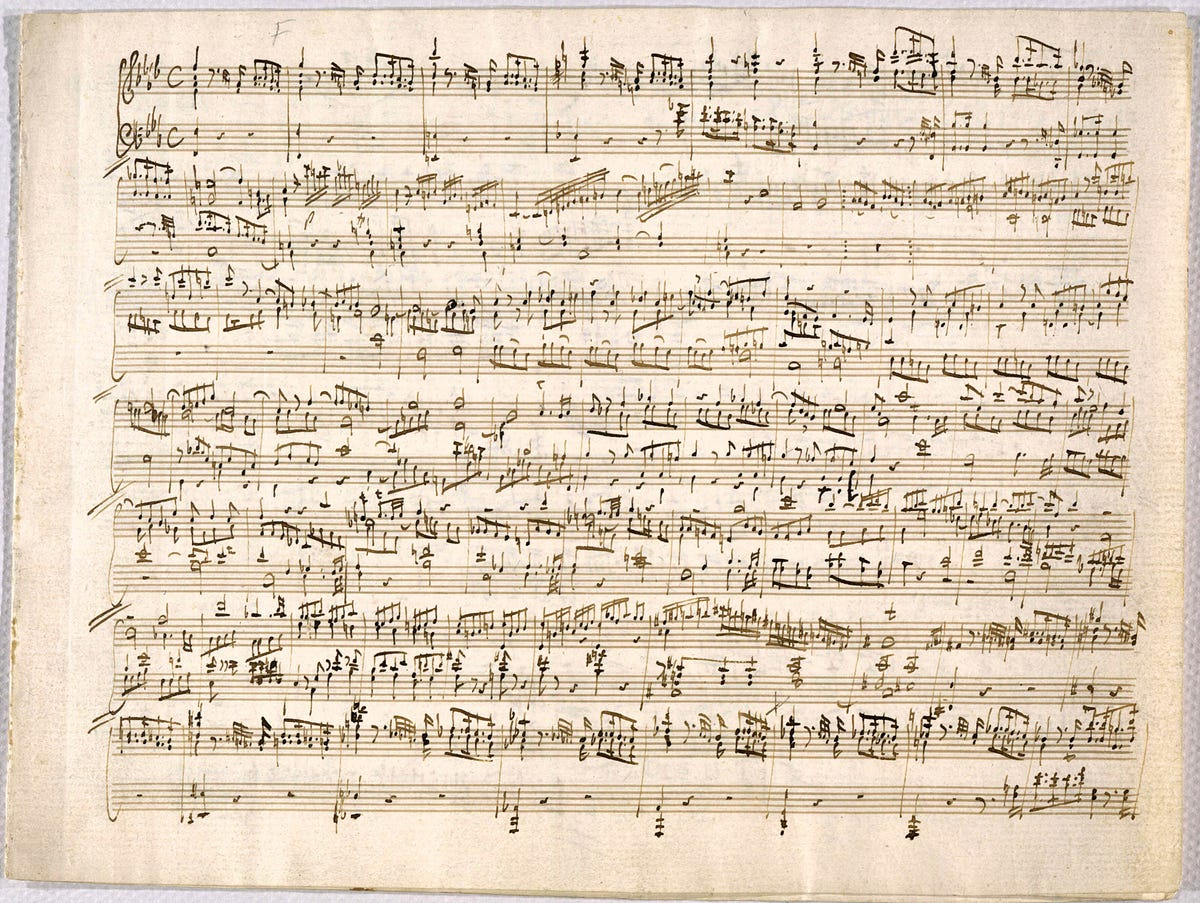

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [ ]:
!pip install pretty_midi

In [ ]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Do not delete this function. We will use this function to extract the values we have talked before.

In [ ]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [ ]:
def createComposersDictionary(root_path):
  composers = {}

  # Extract notes and velocities of each song and 
  # store them in a dictionary with composer names as keys
  # Write a code to bypass corrupted files and print the filenames of the corrupted files

  ### WRITE YOUR CODE ###

  ########################
  return composers

path = ### path for the musicnet_midis folder
composers = createComposersDictionary(path)

## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [ ]:
composer_name_to_index = ### WRITE YOUR CODE ###

In [ ]:
composer_name_to_index

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [ ]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  for i in range(len(notes_and_velocities)):

    ### WRITE YOUR CODE ###
    
    # Bypass the songs with less than 400 notes

    # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors

    # Extract then store the composer names of each 400 sized vectors

    # Extract then store the features(notes and velocities) of each 400 sized vectors 
    # do not forget to flatten the array before storing

    ########################

labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)

# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

In [ ]:
### WRITE YOUR CODE ###

## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [ ]:
### WRITE YOUR CODE ###

## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [ ]:
### WRITE YOUR CODE ###

## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [ ]:
### WRITE YOUR CODE ###

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [ ]:
### WRITE YOUR CODE ###